In [55]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt 
import rasterio
from matplotlib.patches import Rectangle
from shapely.geometry import box, Point
import os

In [56]:
df_1=pd.read_csv(r"C:\Users\rishi\ml_projects\climate\lat_lon_label_3_points.csv")
df_2=pd.read_csv(r"C:\Users\rishi\ml_projects\climate\lat_lon_label_4_points.csv")

In [57]:
tif_paths=[
    r"C:\Users\rishi\ml_projects\climate\500_18\CO\response.tiff",
    r"C:\Users\rishi\ml_projects\climate\500_18\HCHO\response.tiff",
    r"C:\Users\rishi\ml_projects\climate\500_18\NO2\response.tiff",
    r"C:\Users\rishi\ml_projects\climate\500_18\O3\response.tiff",
    r"C:\Users\rishi\ml_projects\climate\500_18\SO2\response.tiff",
]

In [58]:
tif_paths_2=[
    r"C:\Users\rishi\ml_projects\climate\500_23\CO\response.tiff",
    r"C:\Users\rishi\ml_projects\climate\500_23\HCHO\response.tiff",
    r"C:\Users\rishi\ml_projects\climate\500_23\NO2\response.tiff",
    r"C:\Users\rishi\ml_projects\climate\500_23\O3\response.tiff",
    r"C:\Users\rishi\ml_projects\climate\500_23\SO2\response.tiff"
]

In [59]:
tif_paths=tif_paths+tif_paths_2

In [60]:
shapefile_path = r'C:\Users\rishi\ml_projects\climate\hmda_boundary\hmda_boundary.shp'
gdf = gpd.read_file(shapefile_path)
#gdf.plot()

In [61]:
gdf_points_peri = gpd.GeoDataFrame(
    df_1, 
    geometry=gpd.points_from_xy(df_1['LON'], df_1['LAT']),
    crs="EPSG:4326"  # Set the coordinate reference system (WGS84)
)

In [62]:
gdf_points_urban = gpd.GeoDataFrame(
    df_2, 
    geometry=gpd.points_from_xy(df_2['LON'], df_2['LAT']),
    crs="EPSG:4326"  # Set the coordinate reference system (WGS84)
)

In [63]:
shapefile_path = r'C:\Users\rishi\ml_projects\climate\hmda_boundary\hmda_boundary.shp'

# Load the shapefile and GeoDataFrames
shape_data = gpd.read_file(shapefile_path)
gdf_peri = gdf_points_peri  # Peri-urban points
gdf_urban = gdf_points_urban  # Urban points
cmap_scales = []

# Iterate over TIFF files and create three plots for each
def extract_raster_value(gdf, src, raster_data):
    return gdf['geometry'].apply(
        lambda point: (
            raster_data[src.index(point.x, point.y)]
            if 0 <= point.x < src.width and 0 <= point.y < src.height
            else np.nan
        )
    )

# Process for both Peri-urban and Urban
for i, tif_path in enumerate(tif_paths):
    with rasterio.open(tif_path) as src:
        raster_data = src.read(1)  # Read first band
        m = tif_path.split(os.sep)
        if i < 5:  # December 2018 data
            gdf_peri[f'2018_{m[6]}'] = extract_raster_value(gdf_peri, src, raster_data)
            gdf_urban[f'2018_{m[6]}'] = extract_raster_value(gdf_urban, src, raster_data)
        else:  # December 2023 data
            gdf_peri[f'2023_{m[6]}'] = extract_raster_value(gdf_peri, src, raster_data)
            gdf_urban[f'2023_{m[6]}'] = extract_raster_value(gdf_urban, src, raster_data)



In [64]:
gdf_peri

,LAT,LON,geometry,2018_CO,2018_HCHO,2018_NO2,2018_O3,2018_SO2,2023_CO,2023_HCHO,2023_NO2,2023_O3,2023_SO2
0,17.6275,78.08750,POINT (78.0875 17.6275),0.037496,0.000144,0.000040,0.104652,0.000123,0.040394,0.000251,0.000052,0.113460,0.000143
1,17.5225,78.28751,POINT (78.28751 17.5225),0.039345,0.000196,0.000066,0.104795,0.000310,0.040719,0.000228,0.000072,0.113373,0.000408
2,17.4875,78.30750,POINT (78.3075 17.4875),0.038671,0.000192,0.000079,0.104663,0.000168,0.041467,0.000268,0.000080,0.113467,0.000099
3,17.4575,78.31250,POINT (78.3125 17.4575),0.038438,0.000210,0.000088,0.104594,0.000123,0.041048,0.000242,0.000082,0.113267,-0.000028
4,17.4625,78.31250,POINT (78.3125 17.4625),0.037885,0.000198,0.000086,0.104574,0.000180,0.041108,0.000247,0.000083,0.113233,0.000058
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3070,17.2475,78.89750,POINT (78.8975 17.2475),0.040028,0.000227,0.000036,0.105242,0.000044,0.040233,0.000167,0.000030,0.113687,-0.000113
3071,17.5175,78.89750,POINT (78.8975 17.5175),0.039180,0.000127,0.000038,0.105191,0.000080,0.039347,0.000214,0.000036,0.113775,0.000028
3072,17.2425,78.90250,POINT (78.9025 17.2425),0.039967,0.000231,0.000036,0.105221,0.000184,0.040575,0.000151,0.000030,0.113782,-0.000049
3073,17.2475,78.90250,POINT (78.9025 17.2475),0.040081,0.000218,0.000038,0.105276,0.000125,0.040581,0.000159,0.000029,0.113741,-0.000092


In [65]:
from sklearn.preprocessing import MinMaxScaler
# Apply Min-Max Normalization
scaler = MinMaxScaler()
pollutants=["CO", "NO2", "O3", "SO2", "HCHO"]
# Compute differences
for pollutant in pollutants:
    gdf_peri[f"2018_{pollutant}_scaled"]=scaler.fit_transform(gdf_peri[[f"2018_{pollutant}"]])
    gdf_peri[f"2023_{pollutant}_scaled"]=scaler.fit_transform(gdf_peri[[f"2023_{pollutant}"]])

for pollutant in pollutants:
    gdf_peri[f"{pollutant}_dif"] = gdf_peri[f"2023_{pollutant}"] - gdf_peri[f"2018_{pollutant}"]
gdf_peri
columns_to_sum = ["CO_dif", "NO2_dif", "O3_dif", "SO2_dif", "HCHO_dif"]
gdf_peri["mean"] = gdf_peri[columns_to_sum].mean(axis=1)
gdf_peri=gdf_peri.drop_duplicates()

In [66]:
0.25*846

211.5

In [67]:
top_20_differences = {}

for pollutant in pollutants:
    temp = gdf_peri.sort_values(by=f"{pollutant}_dif", ascending=False).head(211)
    top_20_differences[pollutant] = list(zip(temp['LAT'], temp['LON']))  # Store as list of tuples


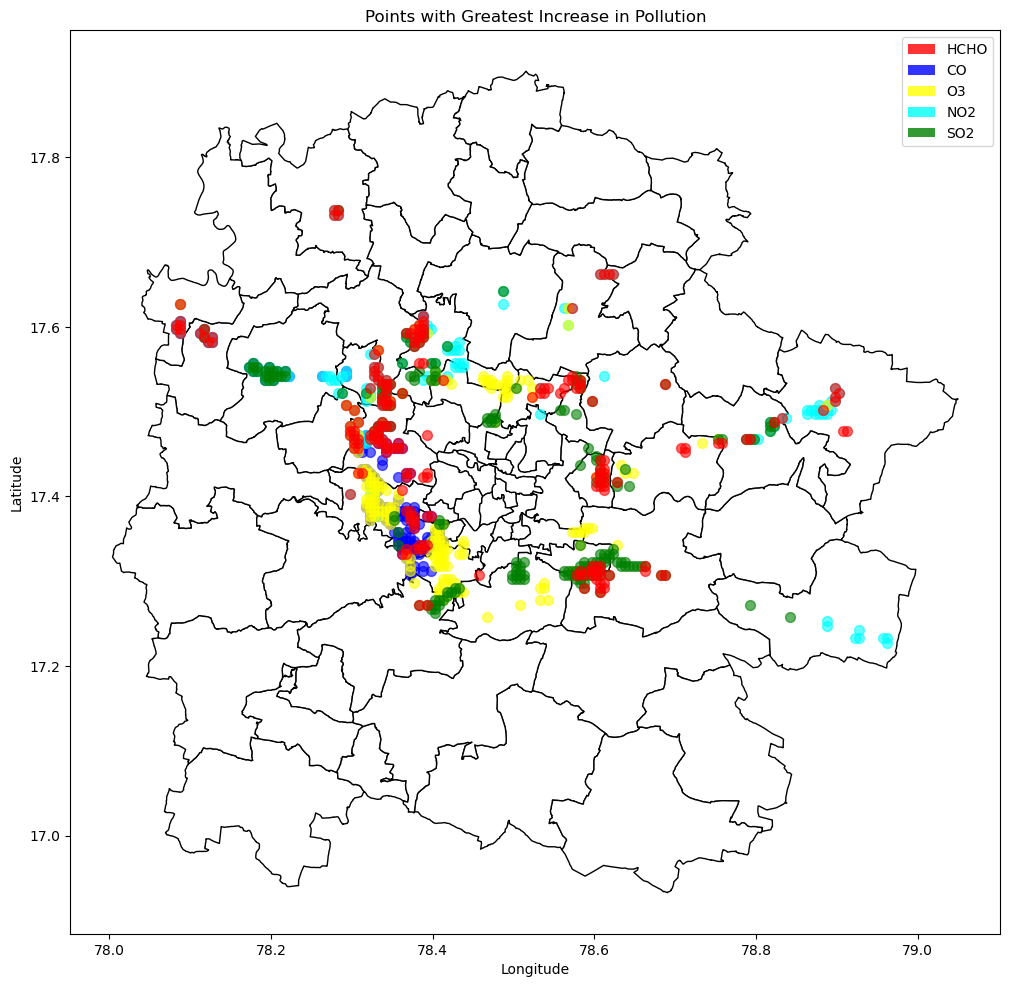

In [72]:
gdfs = {}
for pollutant, coords in top_20_differences.items():
    points = [Point(lon, lat) for lat, lon in coords]  # Notice: (lon, lat)
    gdfs[pollutant] = gpd.GeoDataFrame(geometry=points, crs="EPSG:4326")  # WGS 84

# Plotting
fig, ax = plt.subplots(figsize=(12, 12))
shape_data.plot(ax=ax, color='white', edgecolor='black')

colors = {
    'HCHO': 'red',
    'CO': 'blue',
    'O3': 'yellow',
    'NO2': 'cyan',
    'SO2': 'green',
    
}

for pollutant, gdf in gdfs.items():
    gdf.plot(ax=ax, markersize=50, color=colors[pollutant], label=pollutant, alpha=0.6)

ax.set_title("Points with Greatest Increase in Pollution")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
from matplotlib.patches import Patch

# Create custom legend handles in the desired order
legend_elements = [Patch(facecolor=colors[pollutant], label=pollutant, alpha=0.8) 
                   for pollutant in colors]

ax.legend(handles=legend_elements, loc='upper right')

plt.show()

In [69]:
rows = []
for pollutant, coords in top_20_differences.items():
    for lat, lon in coords:
        rows.append({"Pollutant": pollutant, "LAT": lat, "LONG": lon})

df_all = pd.DataFrame(rows)
df_all.to_csv("top_20_differences_all.csv", index=False)